In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time


from prime_functions import *

# Prime Counts

/home/lee/ml_projects/prime_guesser/prime_functions.py:83: RuntimeWarning: divide by zero encountered in divide
  return np.arange(1, x+1) / np.log(np.arange(1, x+1))


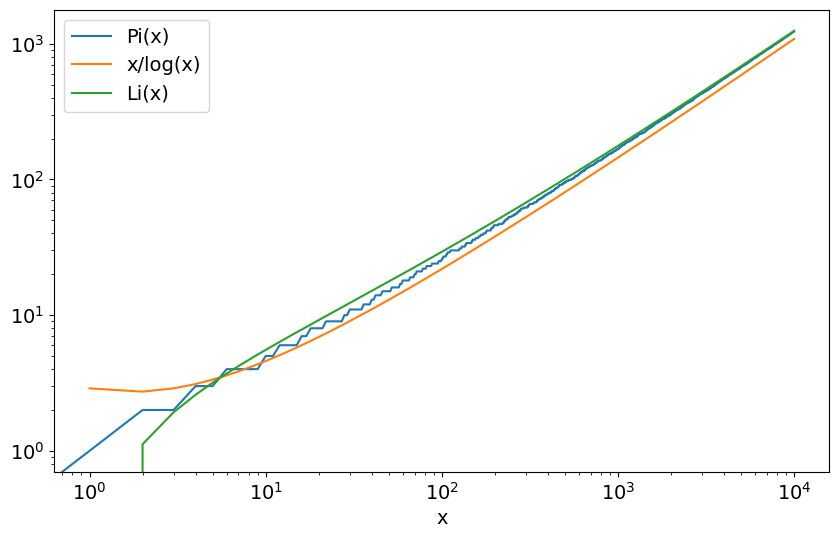

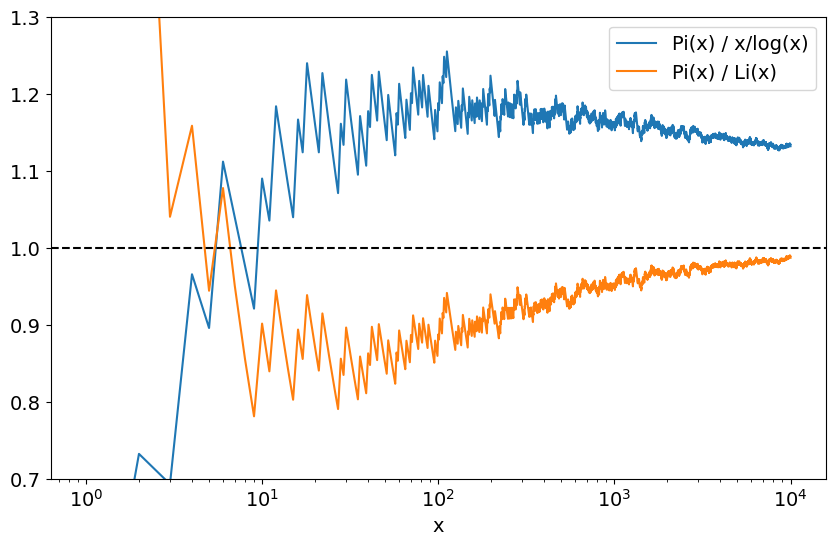

/home/lee/miniconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


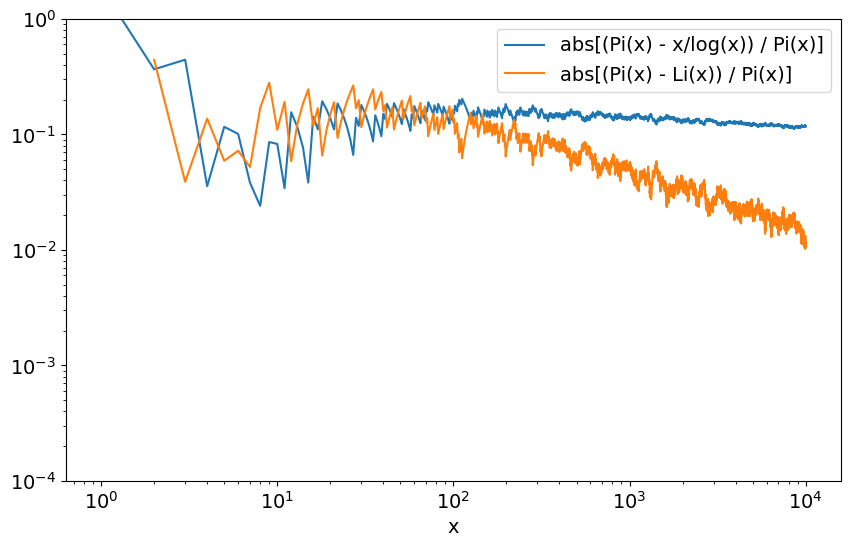

In [2]:
max_num = int(1e4)

plt.rcParams.update({'font.size': 14})

curr_pis = pis(max_num)
curr_pis_approx_x_over_logx = pis_approx_x_over_logx(max_num)
curr_pis_approx_Lix = pis_approx_Lix(max_num)

plt.figure(figsize=(10, 6))
plt.plot(curr_pis, label="Pi(x)")
plt.plot(curr_pis_approx_x_over_logx, label="x/log(x)")
plt.plot(curr_pis_approx_Lix, label="Li(x)")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_pis_approx_x_over_logx = np.where(curr_pis_approx_x_over_logx == 0, np.nan, curr_pis_approx_x_over_logx)
safer_curr_pis_approx_Lix = np.where(curr_pis_approx_Lix == 0, np.nan, curr_pis_approx_Lix)
safer_curr_pis = np.where(curr_pis == 0, np.nan, curr_pis)

curr_pis_approx_x_over_logx_ratio = curr_pis / safer_curr_pis_approx_x_over_logx
curr_pis_approx_Lix_ratio = curr_pis / safer_curr_pis_approx_Lix

plt.figure(figsize=(10, 6))
plt.plot(curr_pis_approx_x_over_logx_ratio, label="Pi(x) / x/log(x)")
plt.plot(curr_pis_approx_Lix_ratio, label="Pi(x) / Li(x)")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.ylim(0.7, 1.3)
plt.show()

ratio_error_x_over_logx = np.abs((curr_pis - safer_curr_pis_approx_x_over_logx) / safer_curr_pis)
ratio_error_Lix = np.abs((curr_pis - safer_curr_pis_approx_Lix) / safer_curr_pis)

plt.figure(figsize=(10, 6))
plt.plot(ratio_error_x_over_logx, label="abs[(Pi(x) - x/log(x)) / Pi(x)]")
plt.plot(ratio_error_Lix, label="abs[(Pi(x) - Li(x)) / Pi(x)]")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-4, 1)
plt.show()


# Nth Prime

/home/lee/ml_projects/prime_guesser/prime_functions.py:123: RuntimeWarning: divide by zero encountered in log
  + np.log(np.log(n)) - 1
/home/lee/ml_projects/prime_guesser/prime_functions.py:124: RuntimeWarning: divide by zero encountered in log
  + (np.log(np.log(n)) - 2) / np.log(n)
/home/lee/ml_projects/prime_guesser/prime_functions.py:125: RuntimeWarning: divide by zero encountered in log
  - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)


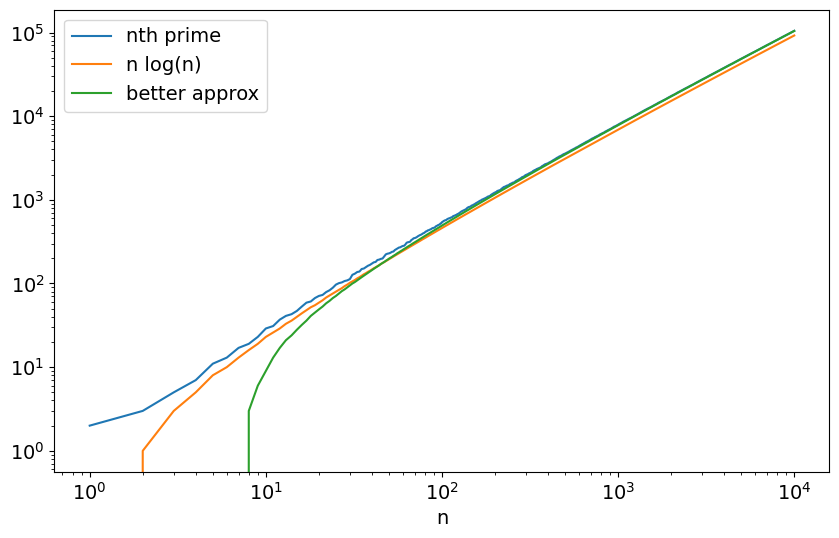

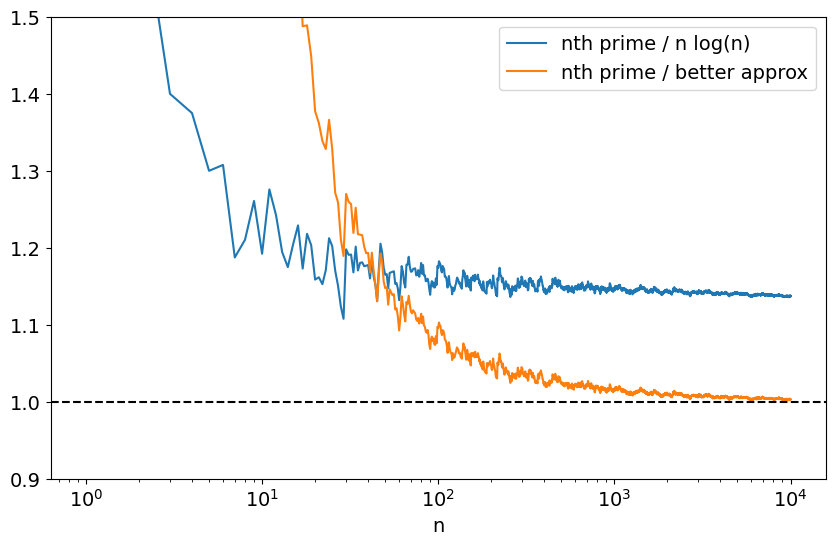

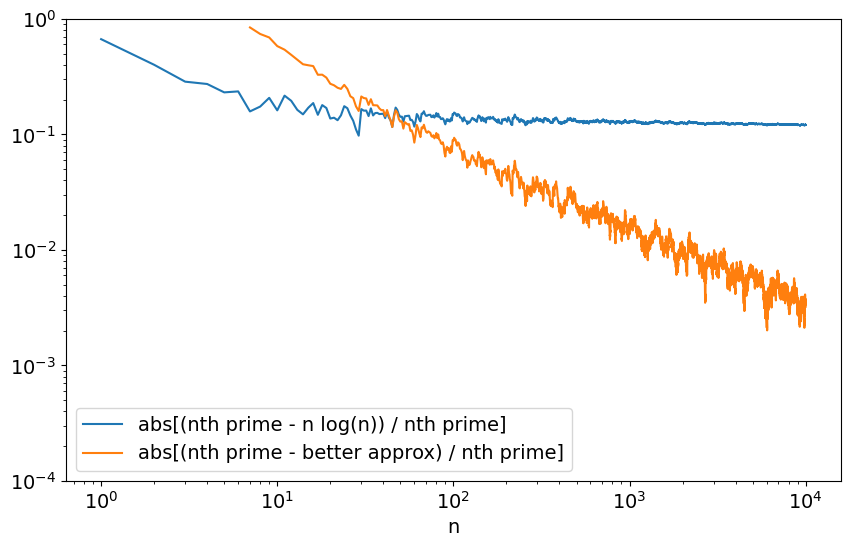

In [3]:
plt.rcParams.update({'font.size': 14})

ns = np.arange(1, max_num+1)
curr_nths = nth_prime_list(max_num)
curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

plt.figure(figsize=(10, 6))
plt.plot(ns, curr_nths, label="nth prime")
plt.plot(ns, curr_nths_approx_nlogn, label="n log(n)")
plt.plot(ns, curr_nths_approx_better, label="better approx")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_nths_approx_nlogn = np.where(curr_nths_approx_nlogn == 0, np.nan, curr_nths_approx_nlogn)
safer_curr_nths_approx_better = np.where(curr_nths_approx_better == 0, np.nan, curr_nths_approx_better)

curr_nths_approx_nlogn_ratio = curr_nths / safer_curr_nths_approx_nlogn
curr_nths_approx_better_ratio = curr_nths / safer_curr_nths_approx_better

plt.figure(figsize=(10, 6))
plt.plot(curr_nths_approx_nlogn_ratio, label="nth prime / n log(n)")
plt.plot(curr_nths_approx_better_ratio, label="nth prime / better approx")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.ylim(0.9, 1.5)
plt.show()

ratio_error_nlogn = np.abs((curr_nths - safer_curr_nths_approx_nlogn) / curr_nths)
ratio_error_better = np.abs((curr_nths - safer_curr_nths_approx_better) / curr_nths)

plt.figure(figsize=(10, 6))
plt.plot(ratio_error_nlogn, label="abs[(nth prime - n log(n)) / nth prime]")
plt.plot(ratio_error_better, label="abs[(nth prime - better approx) / nth prime]")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-4, 1)
plt.show()


# Prime Gaps

## Nth Prime Gap

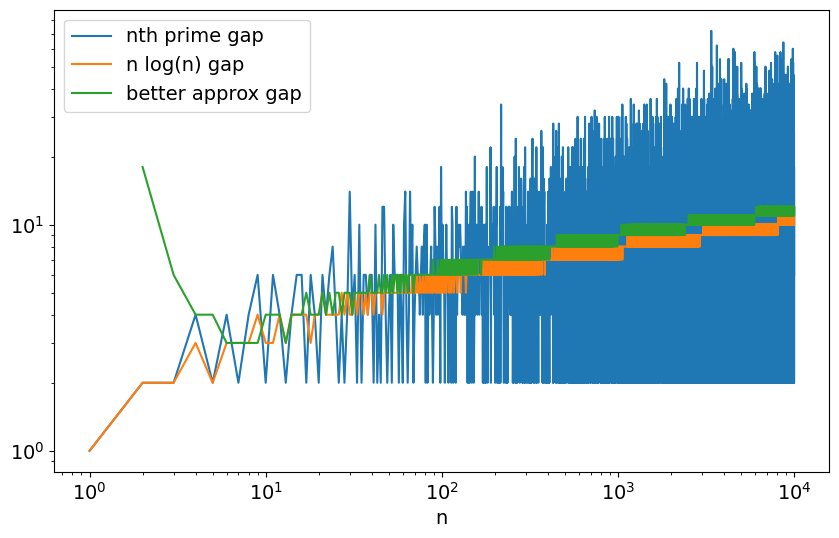

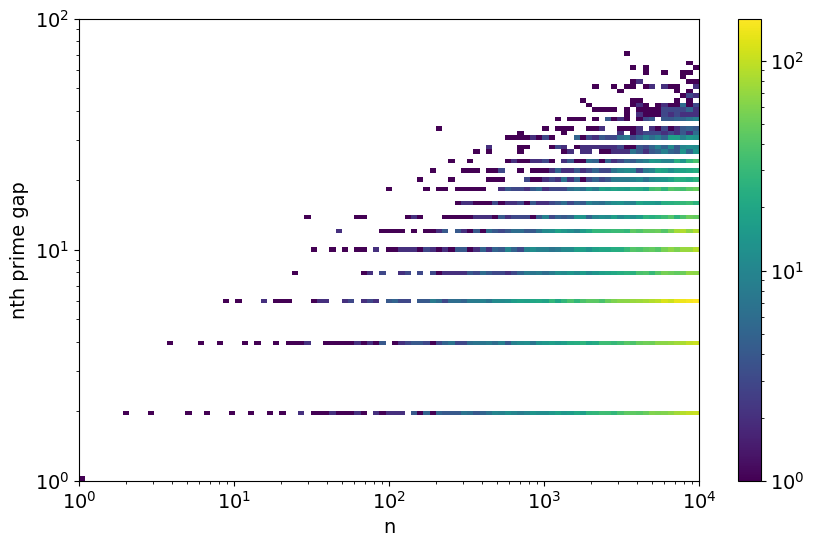

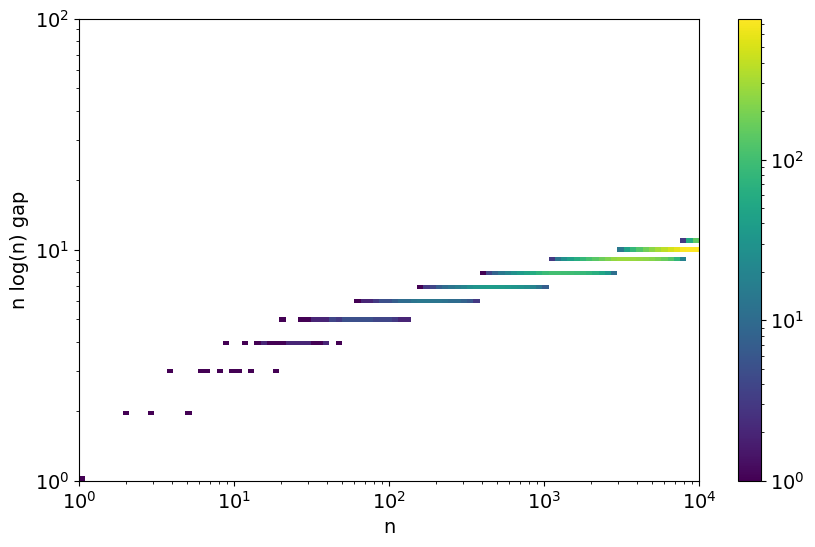

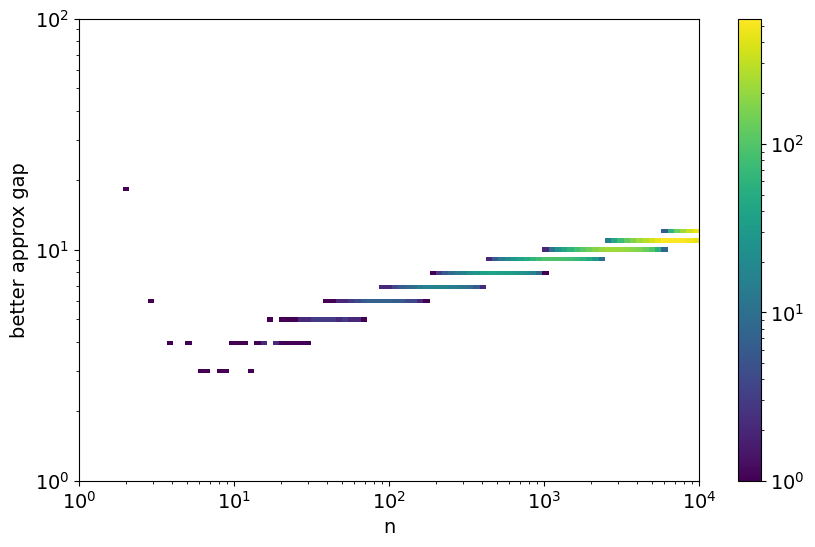

In [4]:
plt.rcParams.update({'font.size': 14})

ns = np.arange(1, max_num+1)
curr_nths = nth_prime_list(max_num)
curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

curr_ns = ns[:-1]
curr_nth_gaps = np.diff(curr_nths)
curr_nth_approx_nlogn_gaps = np.diff(curr_nths_approx_nlogn)
curr_nth_approx_better_gaps = np.diff(curr_nths_approx_better)

plt.figure(figsize=(10, 6))
plt.plot(curr_ns, curr_nth_gaps, label="nth prime gap")
plt.plot(curr_ns, curr_nth_approx_nlogn_gaps, label="n log(n) gap")
plt.plot(curr_ns, curr_nth_approx_better_gaps, label="better approx gap")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.show()

bins_n = np.logspace(0, np.log10(max_num), 100)
bins_gap = np.logspace(0, 2, 100)
bins = (bins_n, bins_gap)

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("nth prime gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_approx_nlogn_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("n log(n) gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_approx_better_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("better approx gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

## Specific Gap Density

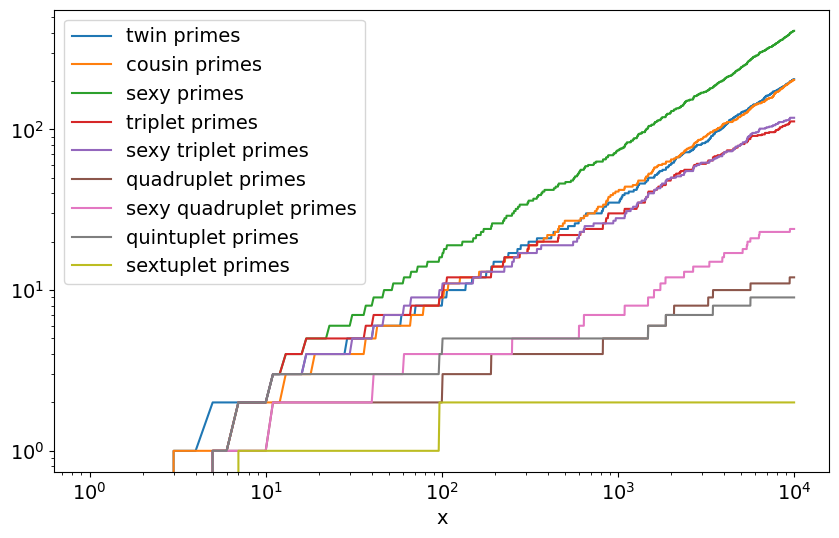

In [5]:
ns = np.arange(1, max_num+1)
curr_twin_primes = get_counts_twin_primes(max_num)
curr_cousin_primes = get_counts_cousin_primes(max_num)
curr_sexy_primes = get_counts_sexy_primes(max_num)
curr_triplet_primes = get_counts_triplet_primes(max_num)
curr_sexy_triplet_primes = get_counts_sexy_triplet_primes(max_num)
curr_quadruplet_primes = get_counts_quadruplet_primes(max_num)
curr_sexy_quadruplet_primes = get_counts_sexy_quadruplet_primes(max_num)
curr_quintuplet_primes = get_counts_quintuplet_primes(max_num)
curr_sextuplet_primes = get_counts_sextuplet_primes(max_num)

plt.figure(figsize=(10, 6))
plt.plot(ns, curr_twin_primes, label="twin primes")
plt.plot(ns, curr_cousin_primes, label="cousin primes")
plt.plot(ns, curr_sexy_primes, label="sexy primes")
plt.plot(ns, curr_triplet_primes, label="triplet primes")
plt.plot(ns, curr_sexy_triplet_primes, label="sexy triplet primes")
plt.plot(ns, curr_quadruplet_primes, label="quadruplet primes")
plt.plot(ns, curr_sexy_quadruplet_primes, label="sexy quadruplet primes")
plt.plot(ns, curr_quintuplet_primes, label="quintuplet primes")
plt.plot(ns, curr_sextuplet_primes, label="sextuplet primes")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()


# Digit Tests

/tmp/ipykernel_3416762/2309198069.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, (last_digit_cum_counts[0] + last_digit_cum_counts[2] + last_digit_cum_counts[4] + last_digit_cum_counts[6] + last_digit_cum_counts[8] + last_digit_cum_counts[5]) / curr_pis, label=f"last digit even or 5")
/tmp/ipykernel_3416762/2309198069.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[1] / curr_pis, label=f"last digit 1")
/tmp/ipykernel_3416762/2309198069.py:17: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[3] / curr_pis, label=f"last digit 3")
/tmp/ipykernel_3416762/2309198069.py:18: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[7] / curr_pis, label=f"last digit 7")
/tmp/ipykernel_3416762/2309198069.py:19: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[9] / curr_pis, label=f"last digit 9")


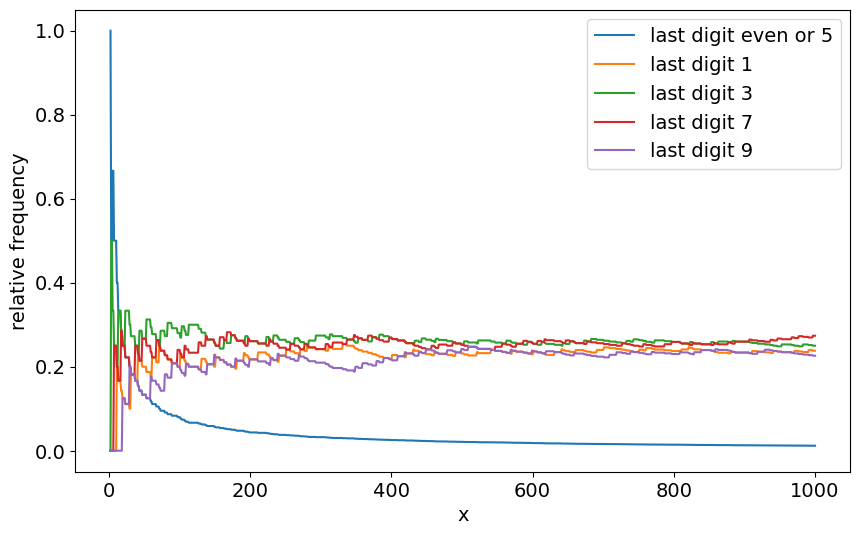

In [6]:
max_num = int(1000)

xs = np.arange(1, max_num+1)
curr_ps = get_prime_list(0, max_num)
curr_pis = pis(max_num)

last_digits_all = xs % 10
last_digits_primes = np.where(np.isin(xs, curr_ps), last_digits_all, np.zeros(max_num, dtype=int) - 1)

last_digit_cum_counts = {}
for i in range(10):
    last_digit_cum_counts[i] = np.cumsum(last_digits_primes == i)

plt.figure(figsize=(10, 6))
plt.plot(xs, (last_digit_cum_counts[0] + last_digit_cum_counts[2] + last_digit_cum_counts[4] + last_digit_cum_counts[6] + last_digit_cum_counts[8] + last_digit_cum_counts[5]) / curr_pis, label=f"last digit even or 5")
plt.plot(xs, last_digit_cum_counts[1] / curr_pis, label=f"last digit 1")
plt.plot(xs, last_digit_cum_counts[3] / curr_pis, label=f"last digit 3")
plt.plot(xs, last_digit_cum_counts[7] / curr_pis, label=f"last digit 7")
plt.plot(xs, last_digit_cum_counts[9] / curr_pis, label=f"last digit 9")
plt.xlabel("x")
plt.ylabel("relative frequency")
plt.legend()
plt.show()



/tmp/ipykernel_3416762/4084684924.py:13: RuntimeWarning: invalid value encountered in remainder
  sum_digits_cum_counts[i] = np.cumsum(sum_digits_primes % i == 0)


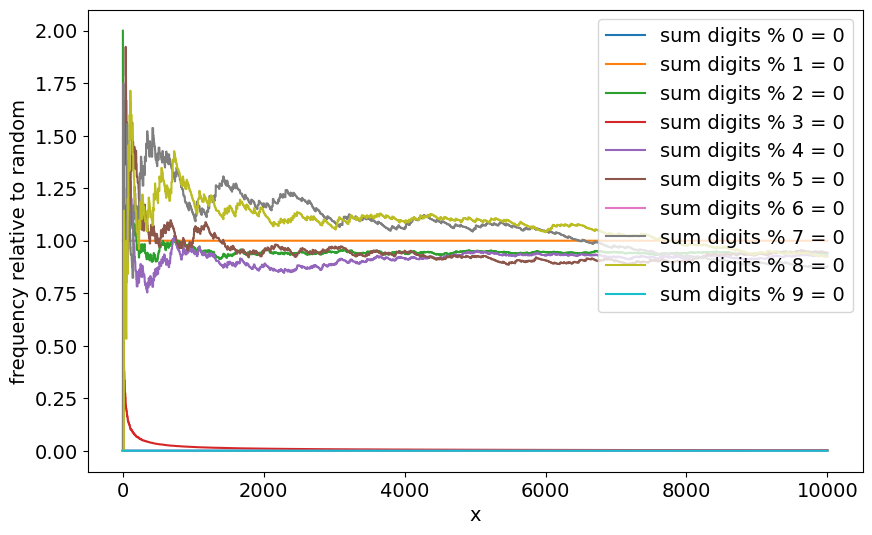

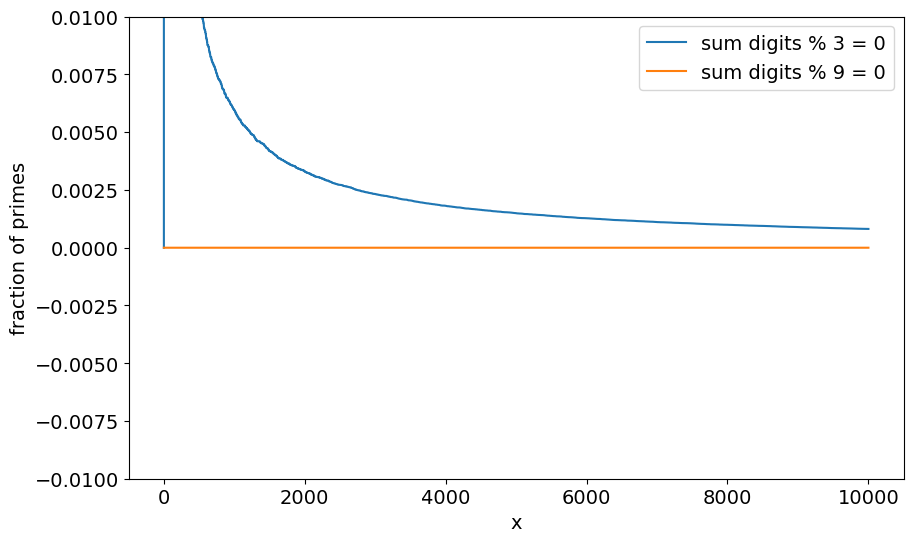

In [7]:
max_num = int(10000)

xs = np.arange(1, max_num+1)
curr_ps = get_prime_list(0, max_num)
curr_pis = pis(max_num)
safer_curr_pis = np.where(curr_pis == 0, np.nan, curr_pis)

sum_digits_all = [np.sum([int(d) for d in str(x)]) for x in xs]
sum_digits_primes = np.where(np.isin(xs, curr_ps), sum_digits_all, np.array([np.nan for _ in range(max_num)]))

sum_digits_cum_counts = {}
for i in range(10):
    sum_digits_cum_counts[i] = np.cumsum(sum_digits_primes % i == 0)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(xs, sum_digits_cum_counts[i] / safer_curr_pis * i, label=f"sum digits % {i} = 0")
plt.xlabel("x")
plt.ylabel("frequency relative to random")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(xs, sum_digits_cum_counts[3] / safer_curr_pis, label=f"sum digits % 3 = 0")
plt.plot(xs, sum_digits_cum_counts[9] / safer_curr_pis, label=f"sum digits % 9 = 0")
plt.xlabel("x")
plt.ylabel("fraction of primes")
plt.legend(loc="upper right")
plt.ylim(-0.01, 0.01)
plt.show()


# Unused

In [8]:
test_speed = False
test_nth_prime = False

if test_speed:

    def get_prime_list_slow(min, max):
        primes = []
        for num in range(min, max + 1):
            if num > 1:
                for i in range(2, num):
                    if (num % i) == 0:
                        break
                else:
                    primes.append(num)
        return primes

    min, max = 0, int(5e4)
    print(len(get_prime_list(min, max))) # 0.0s
    print(len(get_prime_list_slow(min, max))) # 2.3s

if test_nth_prime:
    
    print("2e17-th prime:")
    print(f"real:          8512677386048191063")
    print("my bad approx:", nth_prime_approx_nlogn(int(2e17)))
    print("my approx:    ", nth_prime_approx_better(int(2e17)))
    print("wiki approx:   8512681315554715386")


In [9]:
make_lower_upper_limit_plots = False
if make_lower_upper_limit_plots:

    def nth_prime_approx_lower(n):
        val = n * (
                np.log(n)
            + np.log(np.log(n)) - 1
            )
        if np.isfinite(val) == False:
            return np.nan
        return int(val)

    def nth_prime_approx_upper(n):
        val = n * (
                np.log(n)
            + np.log(np.log(n))
            )
        if np.isfinite(val) == False:
            return np.nan
        return int(val)

    plt.rcParams.update({'font.size': 14})

    ns = np.arange(1, max_num+1)
    curr_nths = nth_prime_list(max_num)
    curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
    curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

    safer_curr_nths_approx_nlogn = np.where(curr_nths_approx_nlogn == 0, np.nan, curr_nths_approx_nlogn)
    safer_curr_nths_approx_better = np.where(curr_nths_approx_better == 0, np.nan, curr_nths_approx_better)

    curr_nths_approx_nlogn_ratio = curr_nths / safer_curr_nths_approx_nlogn
    curr_nths_approx_better_ratio = curr_nths / safer_curr_nths_approx_better

    curr_nths_approx_lower = np.array([nth_prime_approx_lower(n) for n in ns])
    curr_nths_approx_upper = np.array([nth_prime_approx_upper(n) for n in ns])

    curr_nths_approx_nlogn_err = (curr_nths - safer_curr_nths_approx_nlogn) / curr_nths
    curr_nths_approx_better_err = (curr_nths - safer_curr_nths_approx_better) / curr_nths
    curr_nths_approx_lower_err = (curr_nths - curr_nths_approx_lower) / curr_nths
    curr_nths_approx_upper_err = (curr_nths - curr_nths_approx_upper) / curr_nths

    plt.figure(figsize=(10, 6))
    plt.plot(curr_nths_approx_nlogn_err, label="(nth prime - n log(n)) / nth prime")
    plt.plot(curr_nths_approx_better_err, label="(nth prime - better approx) / nth prime")
    plt.fill_between(ns, curr_nths_approx_lower_err, curr_nths_approx_upper_err, alpha=0.5, color="tab:orange")
    plt.axhline(0, color="black", linestyle="--")
    plt.legend()
    plt.xlabel("x")
    #plt.xlim(0, max_num)
    plt.xscale("log")
    plt.ylim(-0.5, 0.5)
    plt.show()
